#1) Importando Bibliotecas

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

2) Definindo os parâmetros a serem variados: (Aqui são informados alguns valores apenas para o teste do código)


In [10]:
# Parâmetros independentes:
N = 1e5
R0 = 2 # Número de reprodução básico
mu = 0.5 # Taxa de cura
delta = 0.01 # Taxa de perda de imunidade
vac_num = 0.6 # Número de vacinas disponíveis (Normalizado)
t0 = 100 # Data de início da vacinação
a = 0.01 # Taxa de vacinação


#Parâmetros dependentes:
beta = mu*R0 # Taxa de transmissão da doença
i_0 = 1/N # Fração inicial de infectados (considerando um único indivíduo infectado em t=0)
s_0 = 1 - i_0 # Fração inicial de suscetíveis
r_0 = 0 # Fração inicial de recuperados 
time_window = vac_num/a # Duração da campanha de vacinação
tf = t0 + time_window # Data de término da vacinação


# Parâmetros da simulação:
t_total = 750 # Número de unidades de tempo que durará a simulação
dt = 0.01 # Intervalo de tempo entre o cálculo de 2 valores da função
t_values = np.arange(0, t_total, dt) #Valores de tempo usados para fazer os gráficos

3)Definindo as funções do Modelo SIRS com vacinação

Possível mudança futura: Trocar a função alpha(t) de um degrau de altura a para outras formas de vacinação plausíveis numa situação real. Ex: Degrau periódico.

Código do modelo SIRS usando a biblioteca solve_ivp do scipy.integrate para o modelo SIRS com vacinação. 

Definindo a função $\alpha(t)$:

$\alpha(t) = 0, x \notin [t_0, t_{stop}] $

$\alpha(t) = \alpha, x \in [t_0, t_{stop}] $

In [11]:
def alpha(t0, tf, t, a):
    return np.where(t0 <= t <= tf, a, 0)

def SIRS(t, y, beta, mu, delta, t0, tf):
  S,I,R = y
  dSdt = -beta*S*I + delta*R - alpha(t0, tf, t, a)
  dIdt = beta*S*I -mu*I
  dRdt = mu*I - delta*R + alpha(t0, tf, t, a)
  return [dSdt, dIdt, dRdt]

delta_t = (0, t_total) #Intervalo no qual ocorrerá a simulação

sol = solve_ivp(SIRS, delta_t, [s_0, i_0, r_0], t=np.linspace(delta_t[0], delta_t[1], int(t_total/dt)), args = (beta, mu, delta, t0, tf), atol=1e-10, max_step=0.1)

O uso da biblioteca solve_ivp tem como objetivo tornar o código mais eficiente e mais veloz, além de garantir uma precisão superior ao método de Euler, visto que esta biblioteca utiliza Runge-Kutta 45 na maioria dos casos.

Após definida a função vamos plotar o gráfico para testar o seu funcionamento:

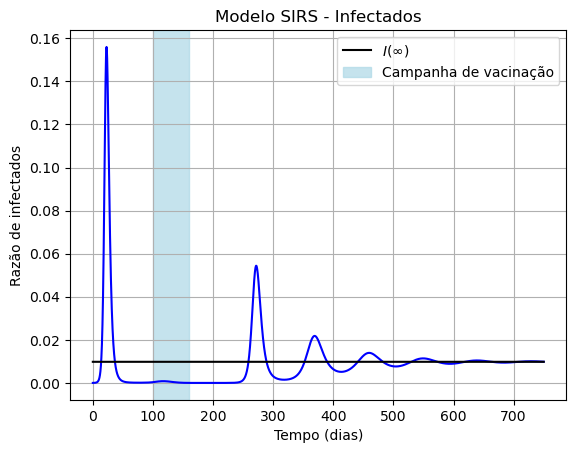

In [12]:
plt.plot(sol.t, sol.y[1], color = 'blue')
plt.plot(t_values, (1-mu/beta)*(delta/(mu+delta))*np.ones(int(t_total/dt)), color='black', label = r'$I(\infty)$')
plt.axvspan(t0, tf, color='lightblue', alpha=0.7, label="Campanha de vacinação")
plt.grid()
plt.legend()
plt.xlabel("Tempo (dias)")
plt.ylabel("Razão de infectados")
plt.title("Modelo SIRS - Infectados")
plt.show()

Variáveis futuramente no código:

i_max = Número máximo de infectados no caso sem vacinação após o dia de início da vacinação no modelo adjacente.

intervalo_t0 = Intervalo de tempo que vai de t0 até o final da simulação

i_max_vac = Número máximo de infectados após o final da campanha de vacinação

a_tf = Valor de  𝛼
  que minimiza i_max_vac

i_max_vac_0 = Número máximo de infectados após o início da campanha de vacinação

a_t0 = Valor de  𝛼
  que minimiza i_max_vac_0

i_min = Número mínimo de infectados durante a campanha de vacinação. Este é um valor que indica possível extinção da epidemia.

Agora iremos criar arrays com valores para cada variável independente, para depois realizar as simulações e armazenar o número mínimo de infectados.

In [13]:
N = np.array([1e4, 1e5, 1e6, 1e7])
R0 = [1, 3, 5, 7, 9, 11, 13, 15] # Número de reprodução básico
MU = [0.05, 0.1, 0.15, 0.2] # Taxa de cura
DELTA = np.linspace(0.01, 0.1, 4) # Taxa de perda de imunidade
VAC_NUM = [0.45, 0.75, 1.05, 1.35, 1.5] # Número de vacinas disponíveis (Normalizado)
T0 = np.array([20, 40, 60, 80, 100, 120, 140]) # Data de início da vacinação
A = np.linspace(0.01, 0.1, 4) #Taxa de vacinação 
print(A)

[0.01 0.04 0.07 0.1 ]


In [14]:
t_total = 750 # Número de unidades de tempo que durará a simulação
dt = 0.01 # Intervalo de tempo entre o cálculo de 2 valores da função
t_values = np.arange(0, t_total, dt) #Valores de tempo usados para fazer os gráficos
import time

N = np.array([1e4])
R0 = np.array([1]) # Número de reprodução básico
MU = np.array([0.05]) # Taxa de cura
DELTA = np.linspace(0.01, 0.1, 2) # Taxa de perda de imunidade
VAC_NUM = np.array([0.45, 0.75]) # Número de vacinas disponíveis (Normalizado)
T0 = np.array([20, 40]) # Data de início da vacinação
A = np.array([0.02, 0.03]) #Taxa de vacinação 
start = time.time()
min_inf = []
for n in N:
    for r0 in R0:
        for mu in MU:
            for delta in DELTA:
                for vac_num in VAC_NUM:
                    for t0 in T0:
                        for a in A:
                            beta = mu*r0 # Taxa de transmissão da doença
                            i_0 = 1/n # Fração inicial de infectados (considerando um único indivíduo infectado em t=0)
                            s_0 = 1 - i_0 # Fração inicial de suscetíveis
                            r_0 = 0 # Fração inicial de recuperados 
                            time_window = vac_num/a # Duração da campanha de vacinação
                            tf = t0 + time_window # Data de término da vacinação
                            delta_t = (0, t_total) #Intervalo no qual ocorrerá a simulação
                            sol = solve_ivp(SIRS, delta_t, [s_0, i_0, r_0], t_eval =np.linspace(delta_t[0], delta_t[1], int(t_total/dt)), args = (beta, mu, delta, t0, tf), atol=1e-10, max_step=0.1)
                            min_inf.append([n, r0, mu,delta,vac_num, t0, a, min(sol.y[1])])
            min_inf_csv = pd.DataFrame(min_inf)
            min_inf_csv.to_csv('Minimo de infectados 5.csv', index=False, header=False)
end = time.time()
print(f"Tempo total de execução: {end - start:.2f} segundos")

KeyboardInterrupt: 

Tempo para 1 simulação: 0,826 s

Agora que sabemos o número mínimo de infectados em cada simulação iremos